<a href="https://colab.research.google.com/github/yogendra1109/IT-Helpdesk-Sentiment-Analysis/blob/main/IT_helpdesk_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = '/content/drive/My Drive/ticket-helpdesk-multi-lang.csv'

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(data_path)

In [5]:
df.head()

,queue,priority,language,subcategory,subject,text
0,ACCOUNTING,MEDIUM,EN,Customer Inquiries::Payments,Inquiry About Payment Method Update,"Dear Support Team,\n\nI would like to update t..."
1,ACCOUNTING,MEDIUM,DE,Employee Inquiries::Health and Safety,Mängel Gesundheitsbericht Anwendung,"Sehr geehrtes Support-Team, ich nutze Ihre Anw..."
2,SOFTWARE,LOW,EN,Crypto Wallets,Crypto Wallets Update Inquiry and Billing Info,"Good day, I hope everything is great on your e..."
3,ACCOUNTING,LOW,EN,Employee Inquiries::Staff Development,Possibility of Business Name Change on Next In...,"Hello team,\n\nI noticed there's a slight typo..."
4,HARDWARE,HIGH,EN,Temperature Sensor,High Priority: Temperature Sensor Not Powering Up,I urgently need assistance with my hardware te...


In [6]:
df.shape

(399, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   queue        399 non-null    object
 1   priority     399 non-null    object
 2   language     399 non-null    object
 3   subcategory  399 non-null    object
 4   subject      399 non-null    object
 5   text         399 non-null    object
dtypes: object(6)
memory usage: 18.8+ KB


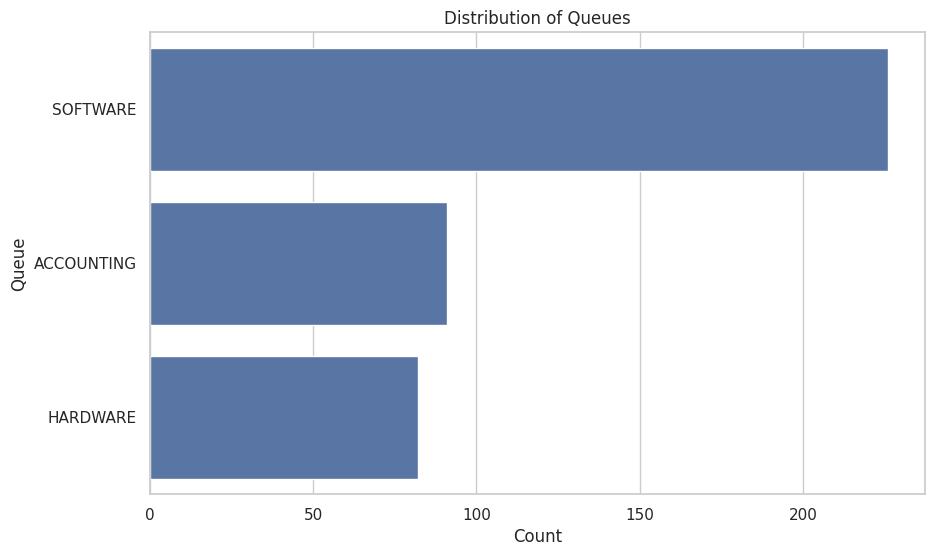

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.countplot(y='queue', data=df, order=df['queue'].value_counts().index)
plt.title('Distribution of Queues')
plt.xlabel('Count')
plt.ylabel('Queue')
plt.show()

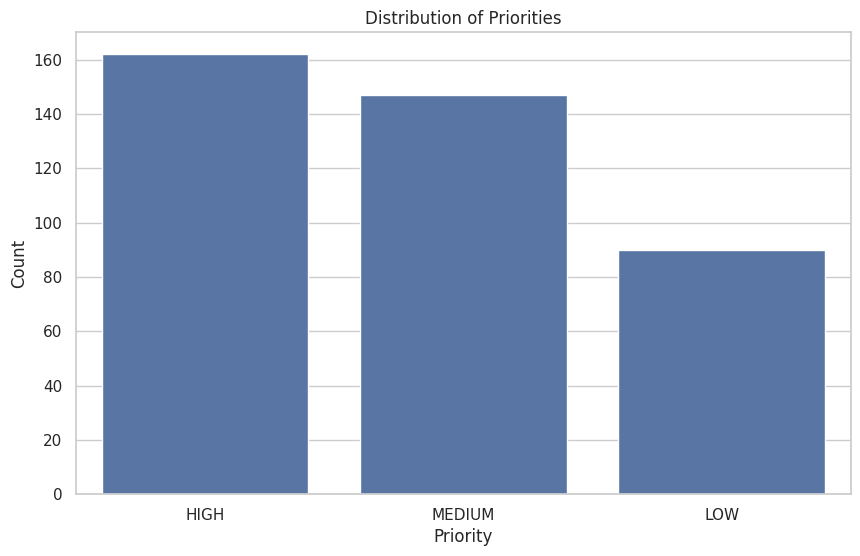

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='priority', data=df, order=df['priority'].value_counts().index)
plt.title('Distribution of Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

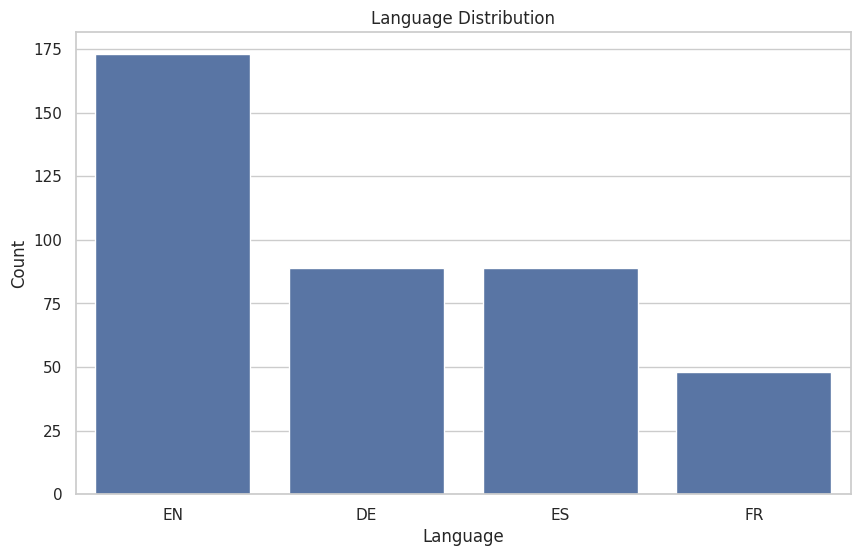

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='language', data=df, order=df['language'].value_counts().index)
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

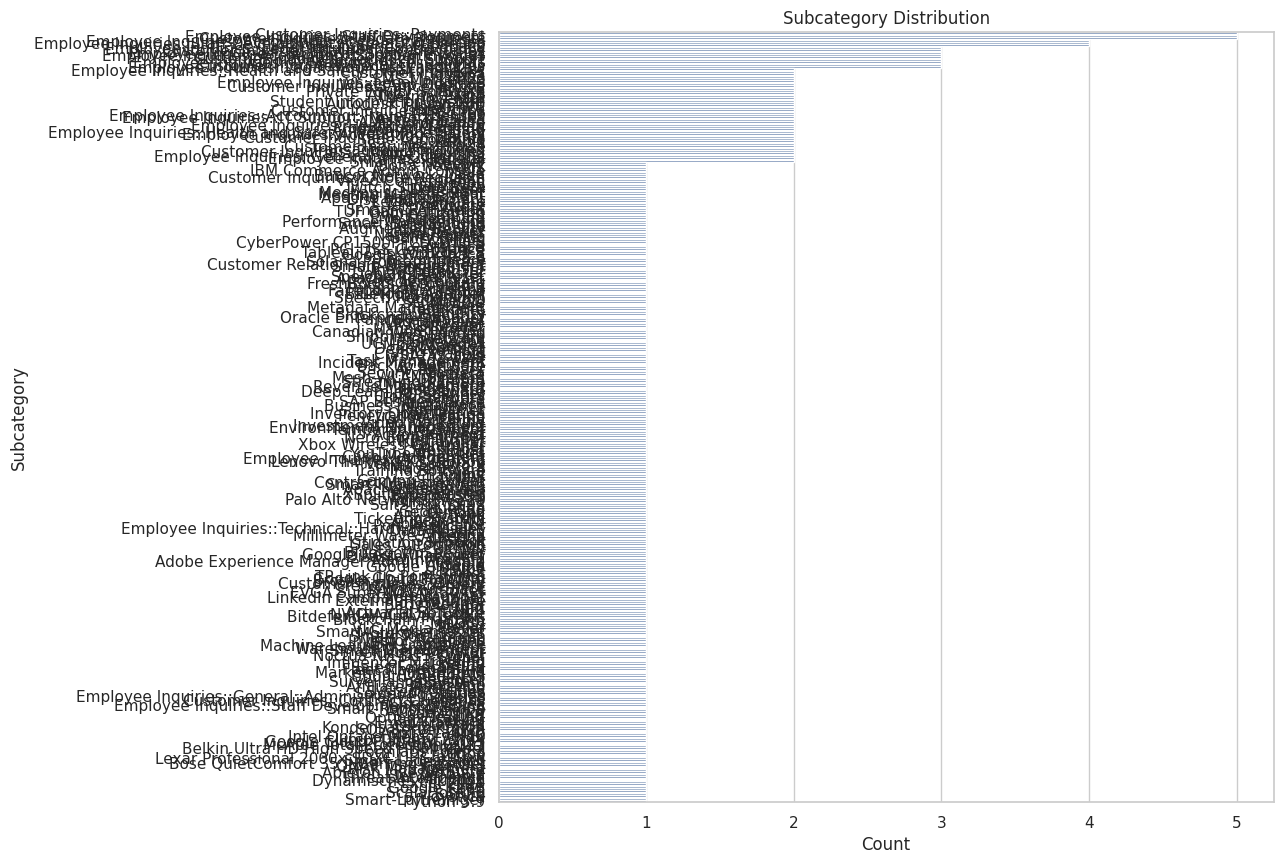

In [11]:
plt.figure(figsize=(10, 10))
sns.countplot(y='subcategory', data=df, order=df['subcategory'].value_counts().index)
plt.title('Subcategory Distribution')
plt.xlabel('Count')
plt.ylabel('Subcategory')
plt.show()

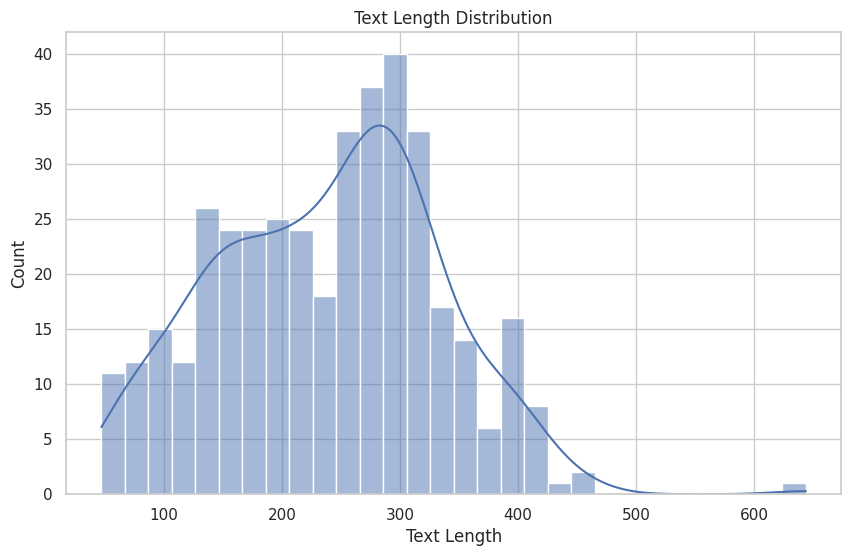

In [12]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

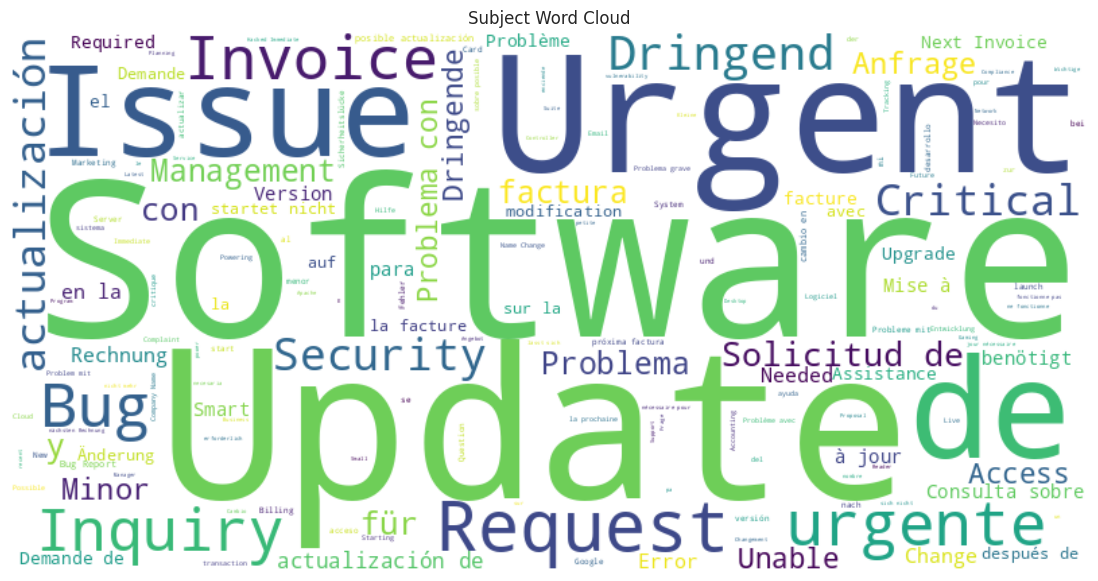

In [13]:
text = " ".join(subject for subject in df.subject)
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Subject Word Cloud')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [15]:
X = df['text']
y_queue = df['queue']
y_priority = df['priority']


In [16]:
X_train, X_test, y_train_queue, y_test_queue = train_test_split(X, y_queue, test_size=0.2, random_state=42)
X_train_priority, X_test_priority, y_train_priority, y_test_priority = train_test_split(X, y_priority, test_size=0.2, random_state=42)

In [17]:
lr_pipeline_queue = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

lr_pipeline_priority = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

In [18]:
lr_pipeline_queue.fit(X_train, y_train_queue)
y_pred_queue = lr_pipeline_queue.predict(X_test)

queue_accuracy = accuracy_score(y_test_queue, y_pred_queue)
queue_classification_report = classification_report(y_test_queue, y_pred_queue)

In [19]:
lr_pipeline_priority.fit(X_train_priority, y_train_priority)
y_pred_priority = lr_pipeline_priority.predict(X_test_priority)

In [20]:
priority_accuracy = accuracy_score(y_test_priority, y_pred_priority)
priority_classification_report = classification_report(y_test_priority, y_pred_priority)

print(queue_accuracy)
print(queue_classification_report)
print(priority_accuracy)
print(priority_classification_report)

0.5875
              precision    recall  f1-score   support

  ACCOUNTING       0.67      0.12      0.20        17
    HARDWARE       1.00      0.06      0.11        18
    SOFTWARE       0.58      0.98      0.73        45

    accuracy                           0.59        80
   macro avg       0.75      0.38      0.34        80
weighted avg       0.69      0.59      0.48        80

0.8875
              precision    recall  f1-score   support

        HIGH       0.93      0.90      0.91        41
         LOW       1.00      0.81      0.90        16
      MEDIUM       0.78      0.91      0.84        23

    accuracy                           0.89        80
   macro avg       0.90      0.88      0.88        80
weighted avg       0.90      0.89      0.89        80



In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_pipeline_queue = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline_priority = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [23]:
rf_pipeline_queue.fit(X_train, y_train_queue)
y_pred_queue_rf = rf_pipeline_queue.predict(X_test)

queue_accuracy_rf = accuracy_score(y_test_queue, y_pred_queue_rf)
queue_classification_report_rf = classification_report(y_test_queue, y_pred_queue_rf)

In [24]:
rf_pipeline_priority.fit(X_train_priority, y_train_priority)
y_pred_priority_rf = rf_pipeline_priority.predict(X_test_priority)

priority_accuracy_rf = accuracy_score(y_test_priority, y_pred_priority_rf)
priority_classification_report_rf = classification_report(y_test_priority, y_pred_priority_rf)

print(queue_accuracy_rf)
print(priority_accuracy_rf)
print(priority_classification_report_rf)

0.6125
0.8875
              precision    recall  f1-score   support

        HIGH       0.86      0.93      0.89        41
         LOW       1.00      0.88      0.93        16
      MEDIUM       0.86      0.83      0.84        23

    accuracy                           0.89        80
   macro avg       0.91      0.88      0.89        80
weighted avg       0.89      0.89      0.89        80



In [25]:
from sklearn.svm import SVC

In [26]:
svm_pipeline_queue = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', SVC(kernel='linear', random_state=42))
])

svm_pipeline_priority = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', SVC(kernel='linear', random_state=42))
])

In [27]:
svm_pipeline_queue.fit(X_train, y_train_queue)
y_pred_queue_svm = svm_pipeline_queue.predict(X_test)

queue_accuracy_svm = accuracy_score(y_test_queue, y_pred_queue_svm)
queue_classification_report_svm = classification_report(y_test_queue, y_pred_queue_svm)

In [28]:
svm_pipeline_priority.fit(X_train_priority, y_train_priority)
y_pred_priority_svm = svm_pipeline_priority.predict(X_test_priority)


In [29]:
priority_accuracy_svm = accuracy_score(y_test_priority, y_pred_priority_svm)
priority_classification_report_svm = classification_report(y_test_priority, y_pred_priority_svm)

In [30]:
print(queue_accuracy_svm)
print(priority_accuracy_svm)
print(queue_classification_report_svm)
print(priority_classification_report_svm)

0.7125
0.925
              precision    recall  f1-score   support

  ACCOUNTING       0.60      0.18      0.27        17
    HARDWARE       1.00      0.61      0.76        18
    SOFTWARE       0.67      0.96      0.79        45

    accuracy                           0.71        80
   macro avg       0.76      0.58      0.61        80
weighted avg       0.73      0.71      0.67        80

              precision    recall  f1-score   support

        HIGH       0.97      0.93      0.95        41
         LOW       1.00      0.88      0.93        16
      MEDIUM       0.81      0.96      0.88        23

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder_queue = LabelEncoder()
y_train_queue_encoded = label_encoder_queue.fit_transform(y_train_queue)
y_test_queue_encoded = label_encoder_queue.transform(y_test_queue)

In [33]:

label_encoder_priority = LabelEncoder()
y_train_priority_encoded = label_encoder_priority.fit_transform(y_train_priority)
y_test_priority_encoded = label_encoder_priority.transform(y_test_priority)


In [34]:
svm_pipeline_queue.fit(X_train, y_train_queue_encoded)


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', SVC(kernel='linear', random_state=42))])

In [35]:
tfidf_vectorizer = svm_pipeline_queue.named_steps['tfidf']
feature_names = tfidf_vectorizer.get_feature_names_out()

In [36]:
svm_model_queue = svm_pipeline_queue.named_steps['clf']
coefficients_queue = svm_model_queue.coef_

In [37]:
top_features_queue = {}
for i, class_label in enumerate(label_encoder_queue.classes_):
    class_coefficients = coefficients_queue.toarray()[i]
    top_features = feature_names[class_coefficients.argsort()[-10:][::-1]]
    top_features_queue[class_label] = top_features.tolist()

top_features_queue

{'ACCOUNTING': ['software',
  'invoice',
  'gmbh',
  'accounting',
  'je',
  'employee',
  'para',
  'la',
  'une',
  'invoices'],
 'HARDWARE': ['accounting',
  'dear',
  'una',
  'desarrollo',
  'invoice',
  'received',
  'corp',
  'enviarme',
  'invoices',
  'sie'],
 'SOFTWARE': ['firmware',
  'smart',
  'turn',
  'power',
  'hardware',
  'le',
  'reader',
  'multiple',
  'device',
  'den']}

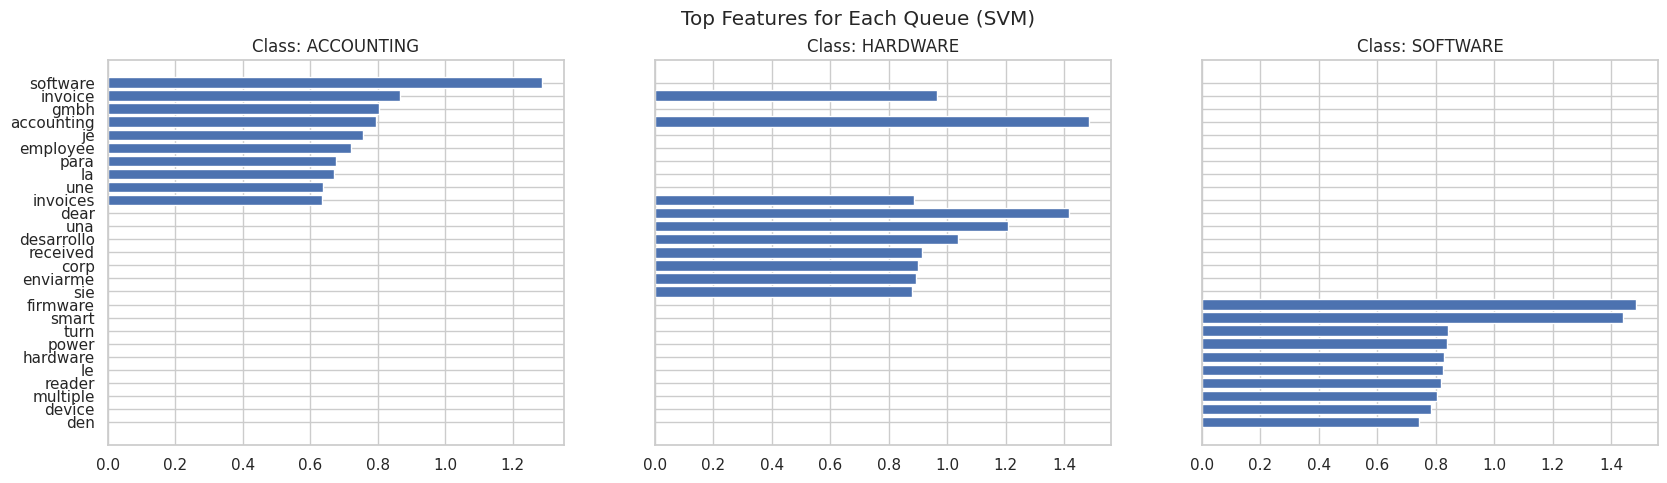

In [38]:
def plot_top_features(top_features, coefficients, feature_names, title):
    fig, axes = plt.subplots(1, len(top_features), figsize=(20, 5), sharey=True)

    if len(top_features) == 1:
        axes = [axes]

    for ax, (class_label, features) in zip(axes, top_features.items()):
        class_index = list(top_features.keys()).index(class_label)
        feature_importance_values = [coefficients[class_index][feature_names.tolist().index(feature)] for feature in features]
        ax.barh(features, feature_importance_values)
        ax.set_title(f'Class: {class_label}')
        ax.invert_yaxis()

    fig.suptitle(title)
    plt.show()

plot_top_features(top_features_queue, coefficients_queue.toarray(), feature_names, 'Top Features for Each Queue (SVM)')

In [39]:
svm_pipeline_priority.fit(X_train_priority, y_train_priority_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', SVC(kernel='linear', random_state=42))])

In [40]:
tfidf_vectorizer_priority = svm_pipeline_priority.named_steps['tfidf']
feature_names_priority = tfidf_vectorizer_priority.get_feature_names_out()


In [41]:
svm_model_priority = svm_pipeline_priority.named_steps['clf']
coefficients_priority = svm_model_priority.coef_

In [42]:
top_features_priority = {}
for i, class_label in enumerate(label_encoder_priority.classes_):
    class_coefficients = coefficients_priority.toarray()[i]
    top_features = feature_names_priority[class_coefficients.argsort()[-10:][::-1]]
    top_features_priority[class_label] = top_features.tolist()

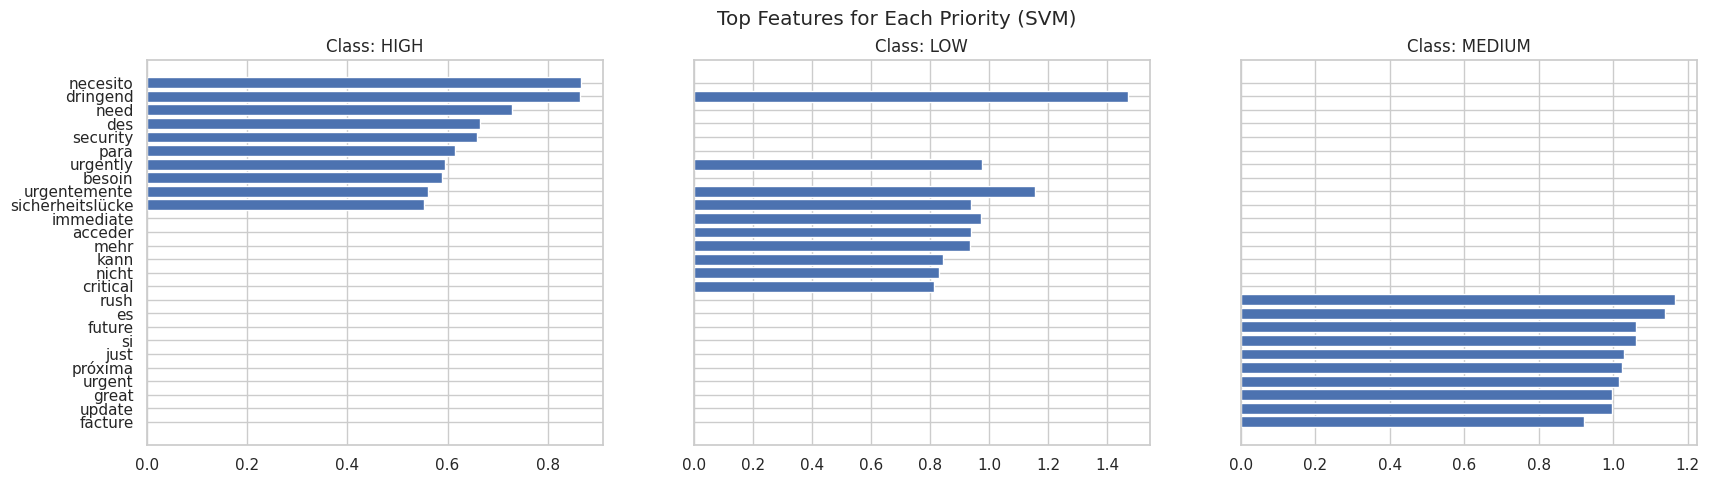

In [43]:
plot_top_features(top_features_priority, coefficients_priority.toarray(), feature_names_priority, 'Top Features for Each Priority (SVM)')

In [44]:
top_features_priority = {}
for i, class_label in enumerate(label_encoder_priority.classes_):
    class_coefficients = coefficients_priority.toarray()[i]
    top_features = feature_names_priority[class_coefficients.argsort()[-10:][::-1]]
    top_features_priority[class_label] = top_features.tolist()


In [45]:
important_features = set()
for features in top_features_queue.values():
    important_features.update(features)
for features in top_features_priority.values():
    important_features.update(features)

In [46]:
tfidf_vectorizer_full = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer_full.fit_transform(df['text'])


In [47]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer_full.get_feature_names_out())
tfidf_important_df = tfidf_df[list(important_features)]


In [48]:
correlation_matrix_important = tfidf_important_df.corr()


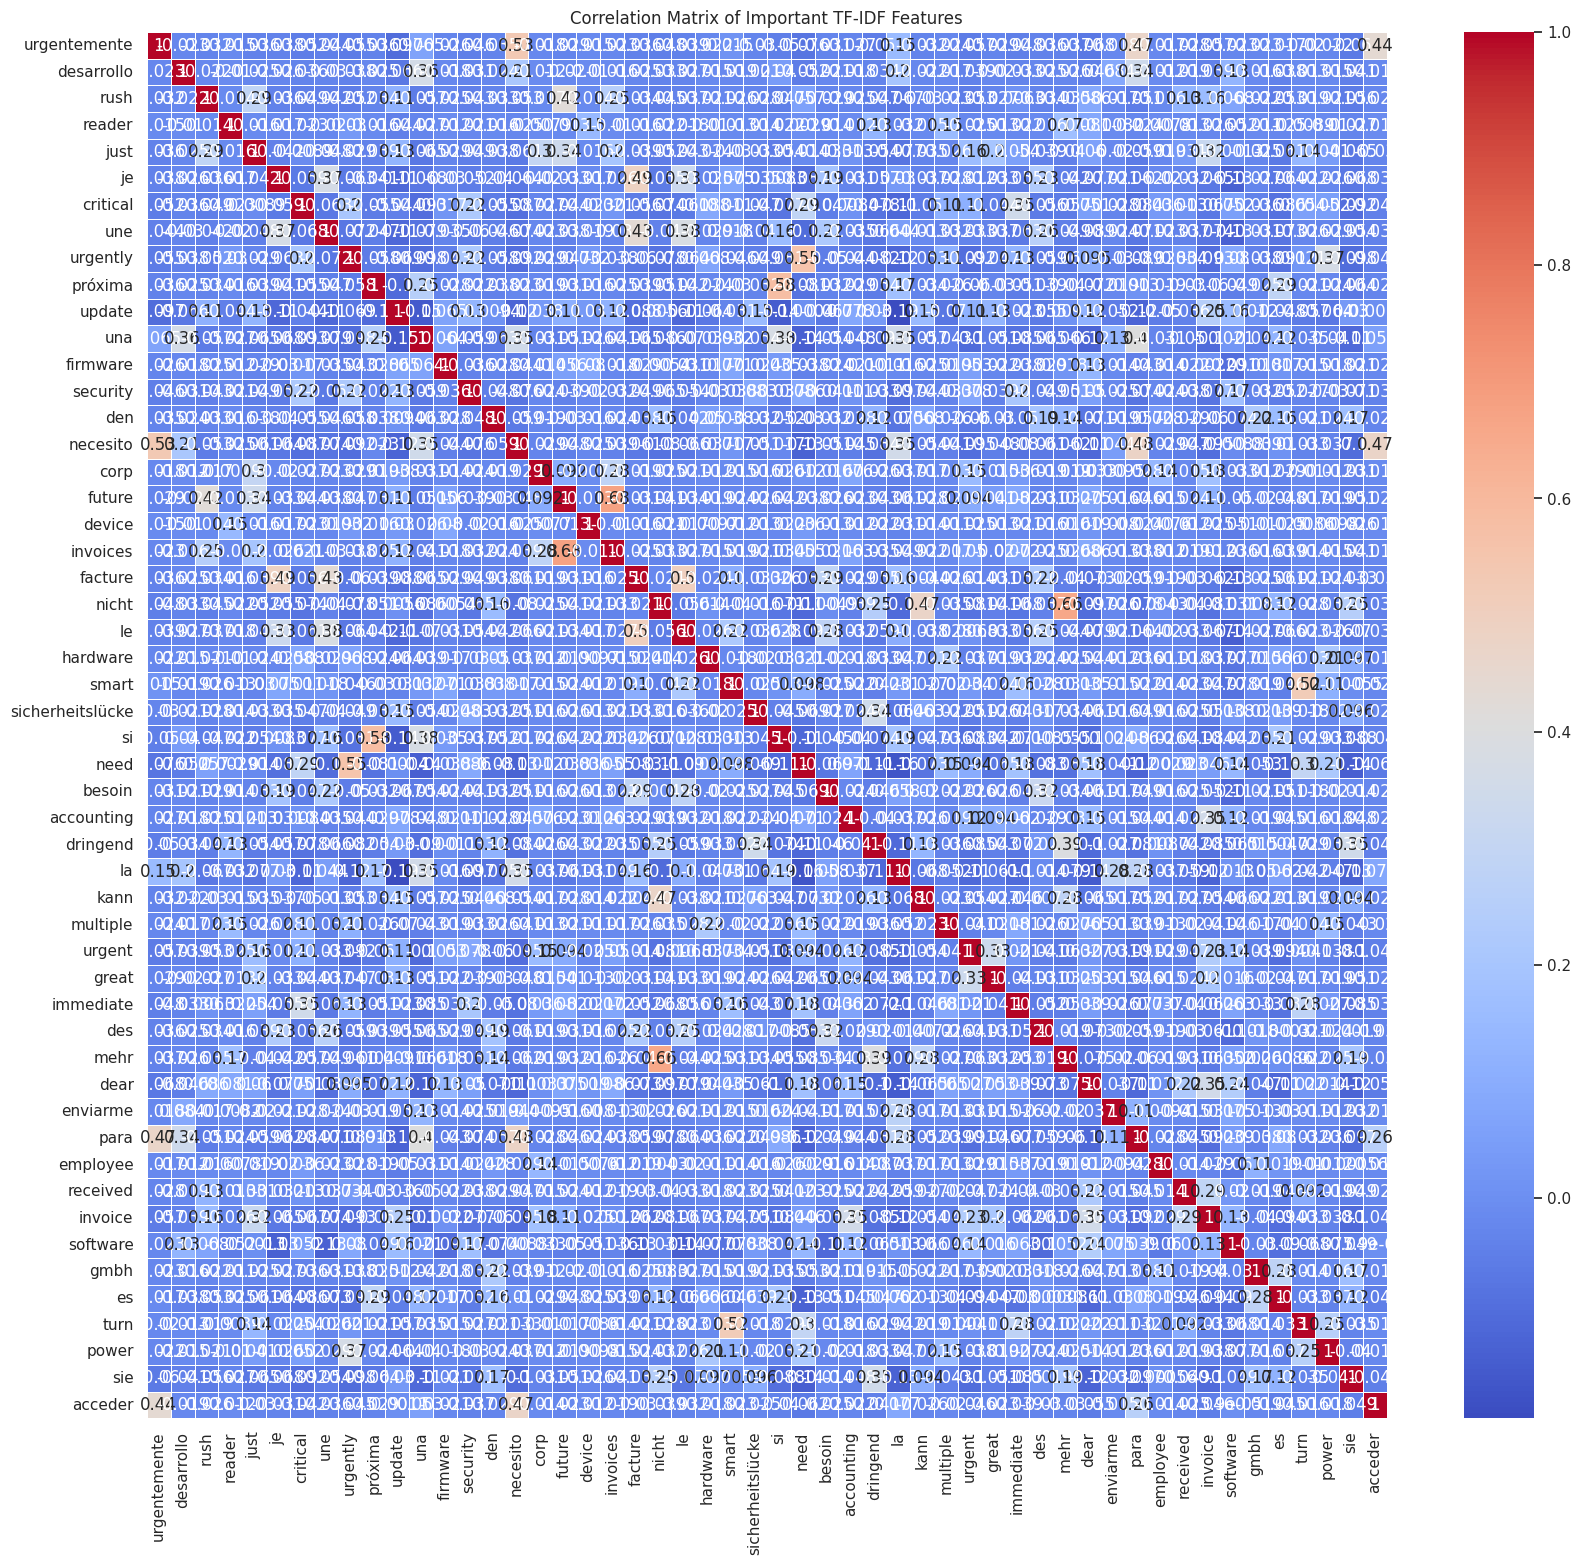

In [49]:
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix_important, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Correlation Matrix of Important TF-IDF Features')
plt.show()

In [50]:
from textblob import TextBlob

In [51]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [52]:
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [54]:
df[['text', 'sentiment', 'sentiment_class']].head(10)

,text,sentiment,sentiment_class
0,"Dear Support Team,\n\nI would like to update t...",0.272727,positive
1,"Sehr geehrtes Support-Team, ich nutze Ihre Anw...",0.000000,neutral
2,"Good day, I hope everything is great on your e...",0.370170,positive
3,"Hello team,\n\nI noticed there's a slight typo...",0.026667,positive
4,I urgently need assistance with my hardware te...,0.000000,neutral
5,"Hallo Support-Team, nach dem letzten Update öf...",0.000000,neutral
6,I'm unable to access our Inventory Optimizatio...,0.000000,neutral
7,"Bonjour, je suis très satisfait de mon Smart-C...",0.000000,neutral
8,"Dear Support, my card reader is having trouble...",-0.066667,negative
9,"Dear Support, I haven't received the invoice f...",0.000000,neutral


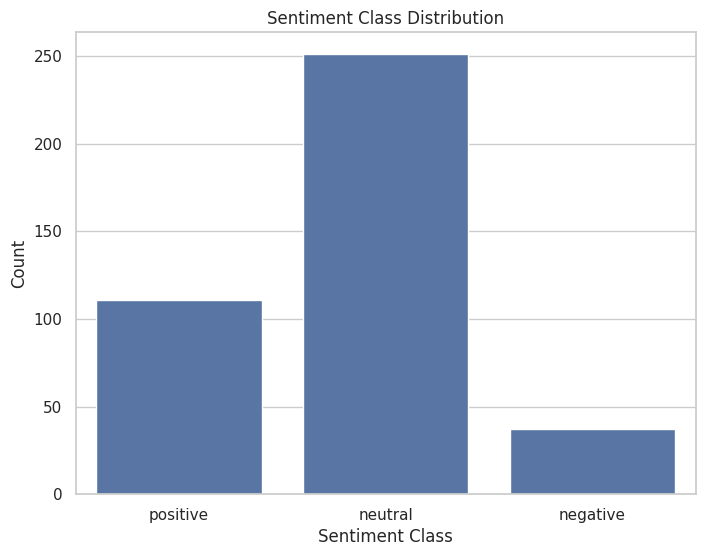

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_class', data=df, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()


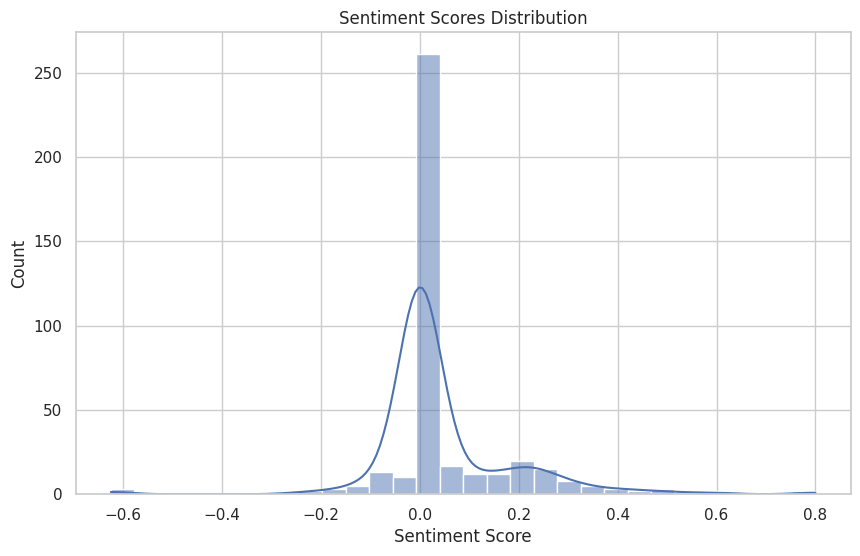

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Scores Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

Conclusion:

Queue and Subcategory: These factors significantly impact sentiment, with certain queues and subcategories showing distinct sentiment patterns.

Text Length: While not directly correlated, longer texts may capture more nuanced sentiments.

Language: Sentiment can vary based on the language used, indicating potential cultural or linguistic differences in expressing sentiments.